In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/Users/chengxinxiangye/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
D_given = pd.read_excel('/Users/Desktop/Homework_7_Data.xlsx', header=None, sheet_name='Discount Function')
D_given.index = np.arange(0.5, 10+0.5, 0.5);D_given

,0
0.5,0.972476
1.0,0.944569
1.5,0.916324
2.0,0.887934
2.5,0.859741
3.0,0.832044
3.5,0.805077
4.0,0.778904
4.5,0.753480
5.0,0.728734


In [ ]:
vol = pd.read_excel('/Users/Desktop/Homework_7_Data.xlsx', header=None, sheet_name='Volatilities (Sigma)')[0]
vol.index = np.arange(0.5, 10.5, 0.5)
vol

0.5     0.0000
1.0     0.0040
1.5     0.0090
2.0     0.0160
2.5     0.0225
3.0     0.0258
3.5     0.0287
4.0     0.0320
4.5     0.0342
5.0     0.0360
5.5     0.0385
6.0     0.0408
6.5     0.0429
7.0     0.0448
7.5     0.0450
8.0     0.0464
8.5     0.0476
9.0     0.0486
9.5     0.0494
10.0    0.0500
Name: 0, dtype: float64

In [ ]:
mat_chol = pd.read_excel('/Users/Desktop/Homework_7_Data.xlsx', header=None, sheet_name='Cholesky Matrix').values

In [5]:
maturity = np.arange(0.5, 10+0.5, 0.5)
time = np.arange(0, 10+0.5, 0.5)

result = pd.DataFrame()
for i in np.arange(0, 1000):
    np.random.seed(i)
    rv = np.random.normal(size=[20, 20])
    dz = pd.DataFrame(np.dot(mat_chol, rv))
    dz.index = maturity
    dz.columns = maturity

    B = pd.DataFrame(D_given, index=maturity, columns= time)
    spot = pd.Series(index=time[:-1])

    for t in maturity:
        spot[t-0.5] = (1/B[t-0.5][t]-1)*2
        B[t] = B[t-0.5]+ spot[t-0.5]*B[t-0.5]/2 + vol[t:]*B[t-0.5] * dz[t]
        
    
    result[i] = spot

In [6]:
result

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0.0,0.056605,0.056605,0.056605,0.056605,0.056605,0.056605,0.056605,0.056605,0.056605,0.056605,...,0.056605,0.056605,0.056605,0.056605,0.056605,0.056605,0.056605,0.056605,0.056605,0.056605
0.5,0.049336,0.048141,0.063765,0.046998,0.060252,0.057183,0.060977,0.043321,0.056242,0.058011,...,0.061792,0.059849,0.056744,0.060551,0.048362,0.061569,0.063683,0.055535,0.056708,0.058388
1.0,0.049494,0.058988,0.067207,0.043738,0.056522,0.070929,0.042046,0.048048,0.044589,0.067812,...,0.083484,0.066338,0.062681,0.067854,0.076390,0.097514,0.094703,0.065507,0.058080,0.039515
1.5,0.035362,0.062537,0.152918,0.018679,0.080572,0.001200,0.060504,0.055554,0.093812,0.117880,...,0.084819,0.056346,0.101257,0.133874,0.058823,0.075666,0.087359,0.030541,0.085857,0.023220
2.0,-0.027785,0.087263,0.015247,0.128427,0.100589,0.028729,0.086068,0.001300,0.120598,0.082811,...,0.068965,0.042865,0.110926,0.129320,0.081020,0.097143,0.063176,0.040520,0.082901,0.079315
2.5,-0.059714,0.005804,0.172895,0.084716,0.045016,0.018124,0.219198,0.127110,0.197825,0.084055,...,0.062888,0.067050,0.057080,0.130827,0.029447,0.005048,0.154113,0.023360,0.087361,0.070540
3.0,0.076301,0.179120,0.097697,0.110539,0.110193,-0.040295,0.072819,0.116644,-0.052904,0.082848,...,0.045068,0.027026,0.071264,0.122877,-0.018465,0.134766,0.215565,0.077344,0.085089,0.059491
3.5,-0.006893,-0.070656,0.009071,0.071104,0.124799,0.058758,0.053277,0.112910,-0.052794,0.133308,...,0.009171,0.108165,0.129884,0.042541,-0.001422,0.040109,-0.063090,0.207521,0.001202,-0.027260
4.0,0.025423,0.072952,0.190252,0.140537,0.104268,0.086635,0.213892,0.156140,-0.060991,0.087959,...,0.297004,0.031070,0.205848,0.117759,-0.065225,0.023608,-0.078721,0.082853,-0.058015,0.143828
4.5,0.163836,-0.008301,0.068425,0.167443,0.030126,0.195984,0.039370,-0.012912,0.012959,0.105373,...,0.155381,0.018534,0.108348,0.032526,0.190104,0.172680,0.153452,-0.035302,0.023057,-0.043415


In [7]:
DT = 1/(1+result/2).cumprod()
DT.mean(axis = 1)
DT.index = maturity

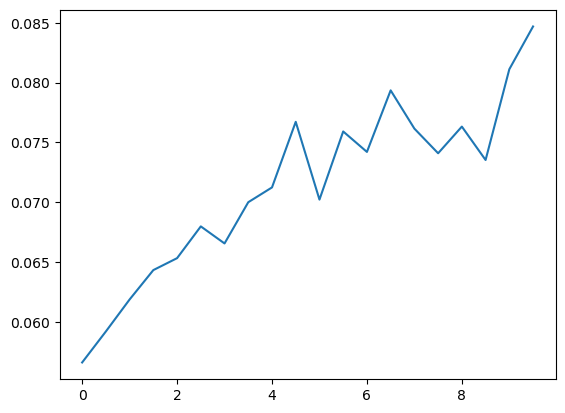

In [8]:
plt.plot(result.mean(axis = 1))

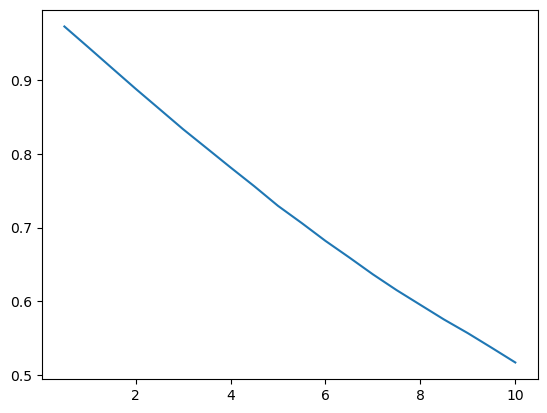

In [9]:
plt.plot(DT.mean(axis = 1))

In [10]:
forward_p=[]
for i in range(1, 6):
    numerator = 2 * (DT.loc[5] - DT.loc[5 + i])
    denominator = DT.loc[5.5:5 + i].sum()
    forward_p.append( (numerator / denominator).mean())

print(forward_p)

[0.07200553298804684, 0.07284428088148209, 0.07247427156831208, 0.07216741250607789, 0.07325341777149495]


In [11]:
forward_p_rates = {}

for m in range(1, 6):
    
    numerator = 2 * (D_given.loc[5][0] - D_given.loc[5 + m][0])
    denominator = D_given.loc[5.5:5 + m][0].sum()

    forward_p_rates[m] = numerator / denominator

forward_p_init = pd.Series(forward_p_rates)
forward_p_init

1    0.068886
2    0.069452
3    0.069903
4    0.070248
5    0.070489
dtype: float64

In [12]:
simulation_data = {}
m_values = [2, 3, 5, 10]

for m in m_values:

    numerator = 2 * (1 - DT.loc[m, :])
    denominator = DT.loc[0.5:m].sum()  
    simulation_data[m] = numerator / denominator

simulation_p = pd.DataFrame(simulation_data)

In [13]:
par = simulation_p.mean()
par

2     0.060234
3     0.061889
5     0.064504
10    0.067747
dtype: float64

In [14]:
def calc_cap(K, simulation, df_simulation):
    simulation_cashflow = (simulation - K) * 0.5
    simulation_cashflow = simulation_cashflow.clip(lower = 0) 
    simulation_cashflow.index = df_simulation.index
    pv1 = (simulation_cashflow * df_simulation).sum().mean() 
    return pv1

In [15]:
pvcap = par.apply(lambda x: calc_cap(x, result, DT)) 
pvcap

2     0.233328
3     0.227569
5     0.218808
10    0.208440
dtype: float64

In [16]:
def calc_reset_cap(m, simulation, df_simulation):
    cashflow = 0.5 * simulation.diff()
    cashflow.index = df_simulation.index
    cashflow_non_negative = cashflow.clip(lower = 0)
    pv2 = (cashflow_non_negative * df_simulation).loc[:m].sum().mean()
    return pv2

In [17]:
calc_reset_cap(5, result, DT)

0.09552038631669402

In [18]:
CMS_rates = {}
m = 5
for t in np.arange(0.5, 5.5, 0.5):
    numerator = 2 * (DT.loc[t, :] - DT.loc[t + m, :])
    denominator = DT.loc[(t + 0.5):(t + m), :].sum()
    CMS_rate = numerator / denominator
    CMS_rates[t] = CMS_rate
CMS_simulation = pd.DataFrame(CMS_rates).T
CMS_simulation.loc[:,0:4]

,0,1,2,3,4
0.5,0.026500,0.054498,0.094375,0.082896,0.086097
1.0,0.030915,0.044967,0.088099,0.095106,0.077005
1.5,0.021418,0.067462,0.078228,0.073899,0.076112
2.0,0.026004,0.061940,0.089347,0.073955,0.067002
2.5,0.033213,0.055336,0.109456,0.039670,0.051979
3.0,0.055001,0.048149,0.111267,0.038101,0.049848
3.5,0.053909,0.049226,0.100681,0.047542,0.035015
4.0,0.060297,0.064012,0.107265,0.050716,0.027947
4.5,0.070061,0.069337,0.079566,0.057867,0.009469
5.0,0.071731,0.086686,0.057931,0.049231,0.012778


In [19]:
cashflow_simulation = CMS_simulation - 0.05
cashflow_simulation = 0.5 * cashflow_simulation.mask(cashflow_simulation < 0,0)* DT[:5]
pv3 = cashflow_simulation.sum().mean()
pv3

0.1039756662195453